In [5]:
pip install pandas textblob matplotlib wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.4 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 196.9 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.4 kB 403.5 kB/s eta 0:00:01
   ------------------------------ ------- 245.8/301.4 kB 888.8 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 965.4 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 848.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Sample dataset
data = {
    'text': [
        "I love this product! It's amazing.",
        "This is the worst service I have ever experienced.",
        "I'm not sure how I feel about this.",
        "The experience was okay, not great but not bad either.",
        "Absolutely fantastic! Highly recommended."
    ]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                                text
0                 I love this product! It's amazing.
1  This is the worst service I have ever experien...
2                I'm not sure how I feel about this.
3  The experience was okay, not great but not bad...
4          Absolutely fantastic! Highly recommended.


In [2]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment function to each text in the DataFrame
df['sentiment'] = df['text'].apply(get_sentiment)

# Display the DataFrame with sentiment analysis
print(df)


                                                text  sentiment
0                 I love this product! It's amazing.     0.6125
1  This is the worst service I have ever experien...    -0.1000
2                I'm not sure how I feel about this.    -0.2500
3  The experience was okay, not great but not bad...     0.1500
4          Absolutely fantastic! Highly recommended.     0.3300


In [3]:
# Define sentiment categories based on polarity
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display the DataFrame with sentiment categories
print(df)


                                                text  sentiment  \
0                 I love this product! It's amazing.     0.6125   
1  This is the worst service I have ever experien...    -0.1000   
2                I'm not sure how I feel about this.    -0.2500   
3  The experience was okay, not great but not bad...     0.1500   
4          Absolutely fantastic! Highly recommended.     0.3300   

  sentiment_category  
0           Positive  
1           Negative  
2           Negative  
3           Positive  
4           Positive  


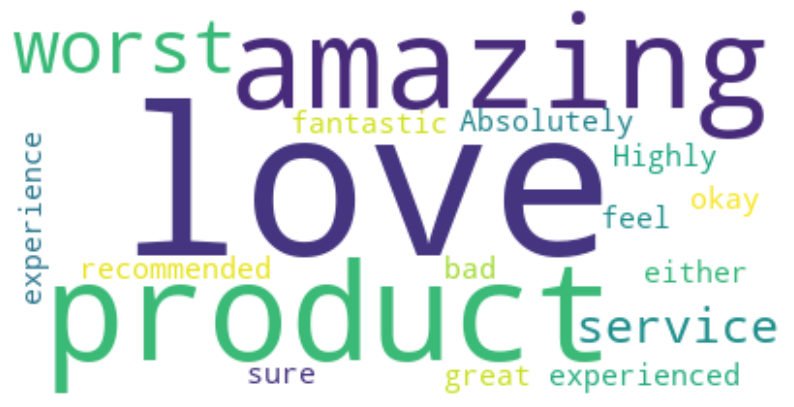

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text into one string
text = " ".join(review for review in df.text)

# Generate a word cloud
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
